# El método del codo y el factor de silueta

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [4]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array(list(zip(x1,x2))).reshape(len(x1),2)

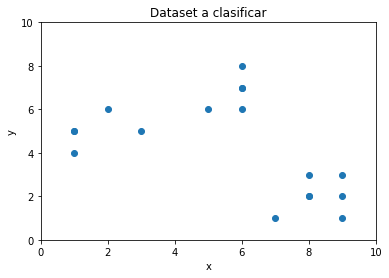

In [6]:
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1,x2)
plt.show()

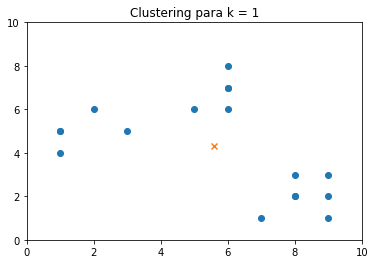

* Para k =  2 , el promedio de la silueta es:  0.6113424368705715
   - Para i =  1 , la silueta del cluster vale:  0.49704450958269375
   - Para i =  2 , la silueta del cluster vale:  0.7746251901389686


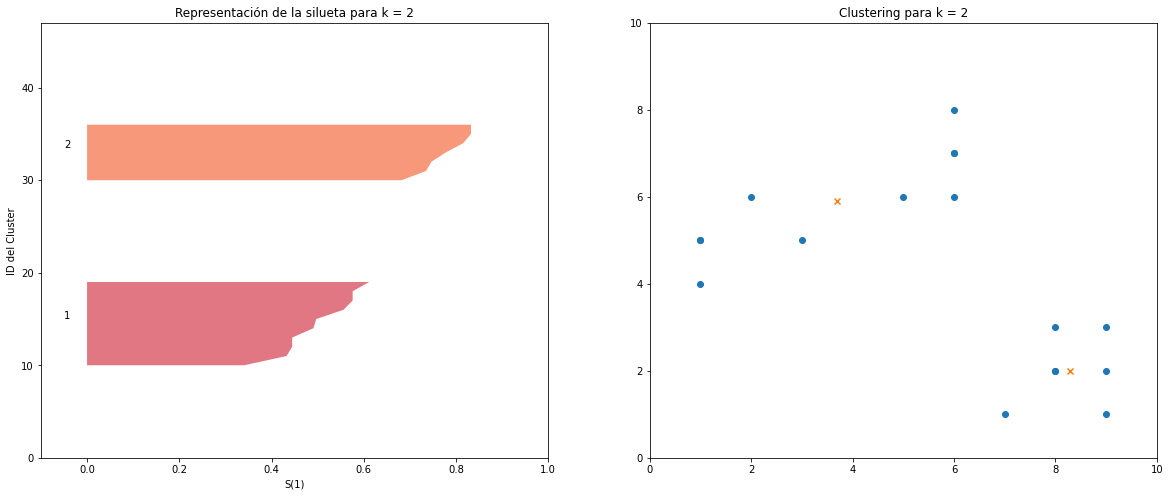

* Para k =  3 , el promedio de la silueta es:  0.7122079383287169
   - Para i =  1 , la silueta del cluster vale:  0.7345257364682265
   - Para i =  2 , la silueta del cluster vale:  0.6609508863896014
   - Para i =  3 , la silueta del cluster vale:  0.7322200728725188


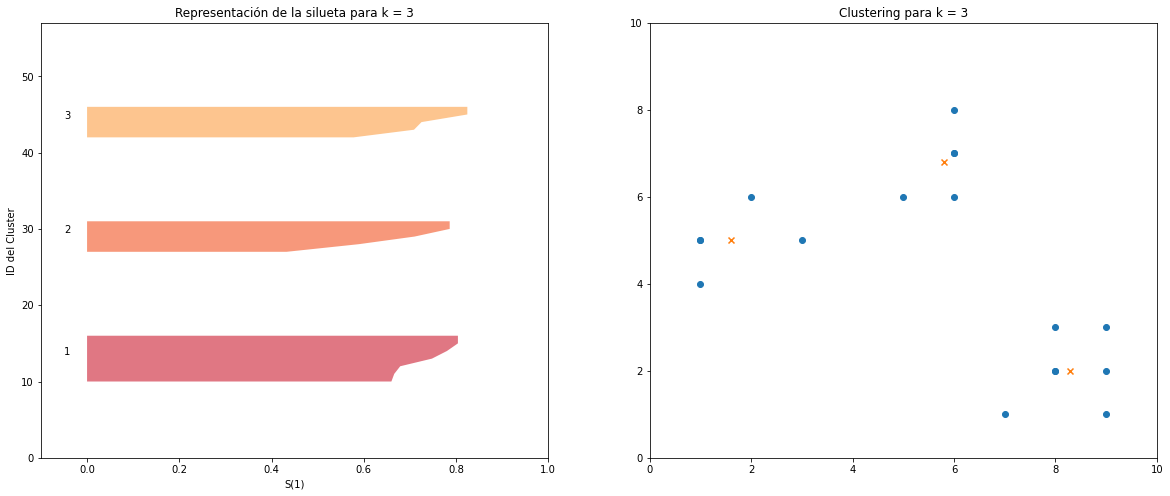

* Para k =  4 , el promedio de la silueta es:  0.6389948643127632
   - Para i =  1 , la silueta del cluster vale:  0.24096929517637128
   - Para i =  2 , la silueta del cluster vale:  0.7345257364682265
   - Para i =  3 , la silueta del cluster vale:  0.654458796162702
   - Para i =  4 , la silueta del cluster vale:  0.655666655624379


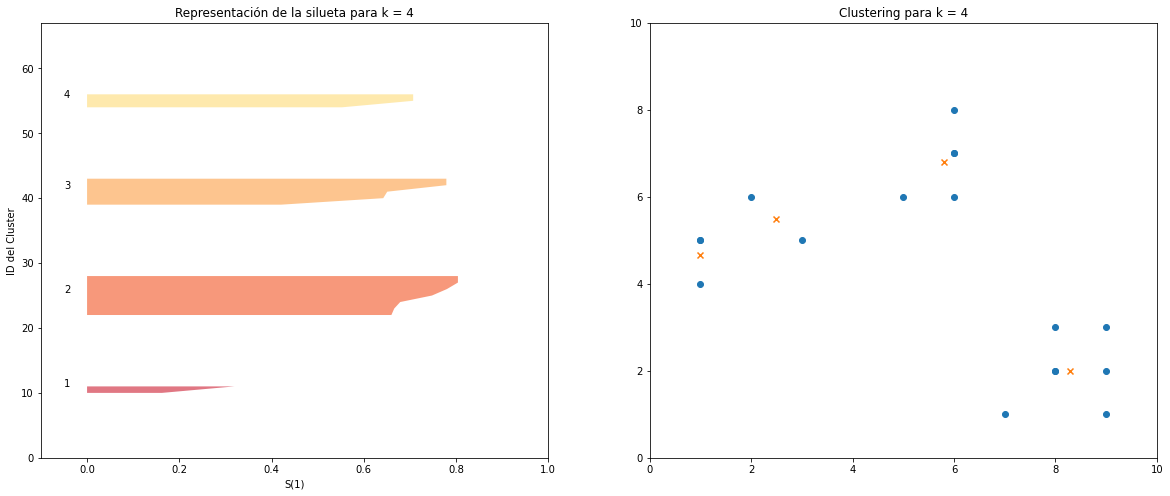

* Para k =  5 , el promedio de la silueta es:  0.450456025779209
   - Para i =  1 , la silueta del cluster vale:  0.42346712707864664
   - Para i =  2 , la silueta del cluster vale:  0.24096929517637128
   - Para i =  3 , la silueta del cluster vale:  0.654458796162702
   - Para i =  4 , la silueta del cluster vale:  -0.09040786759303471
   - Para i =  5 , la silueta del cluster vale:  0.655666655624379


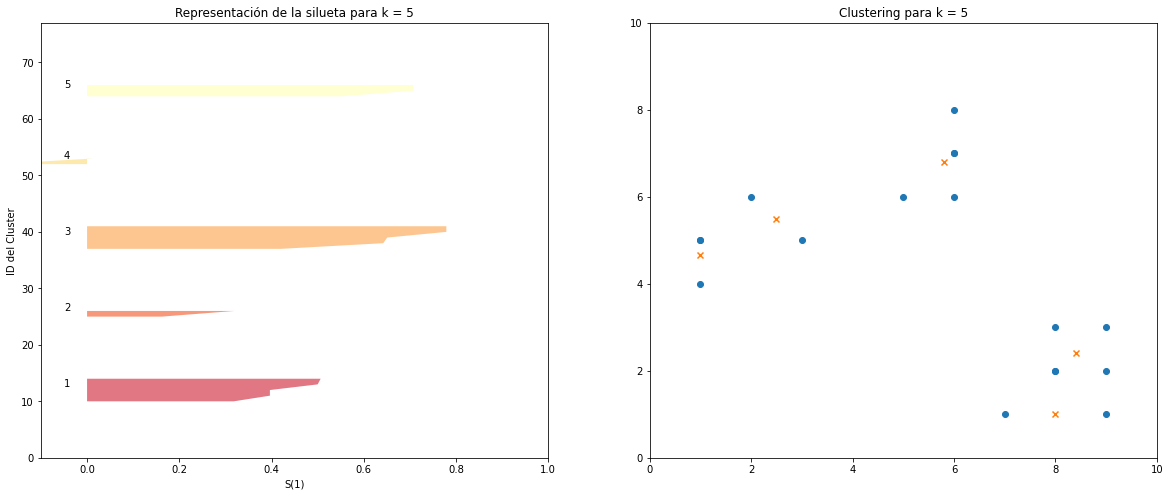

* Para k =  6 , el promedio de la silueta es:  0.4159974962395202
   - Para i =  1 , la silueta del cluster vale:  0.37765685097302226
   - Para i =  2 , la silueta del cluster vale:  0.24096929517637128
   - Para i =  3 , la silueta del cluster vale:  0.5664789734180768
   - Para i =  4 , la silueta del cluster vale:  0.655666655624379
   - Para i =  5 , la silueta del cluster vale:  0.0
   - Para i =  6 , la silueta del cluster vale:  0.32882042637679976


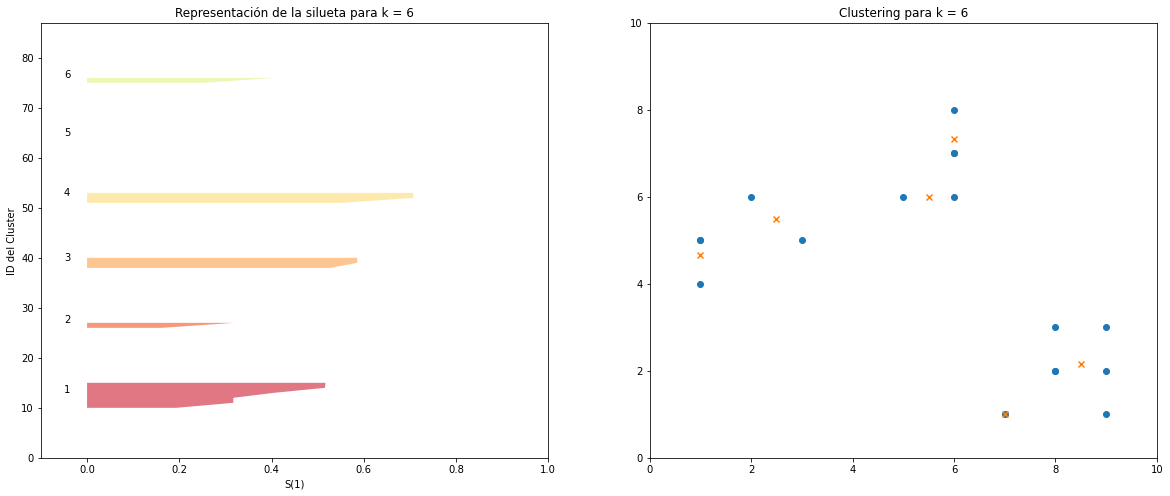

* Para k =  7 , el promedio de la silueta es:  0.3585114420477484
   - Para i =  1 , la silueta del cluster vale:  0.3869086846339371
   - Para i =  2 , la silueta del cluster vale:  0.32882042637679976
   - Para i =  3 , la silueta del cluster vale:  0.3503771888434877
   - Para i =  4 , la silueta del cluster vale:  0.5664789734180768
   - Para i =  5 , la silueta del cluster vale:  0.31256470041698214
   - Para i =  6 , la silueta del cluster vale:  0.0
   - Para i =  7 , la silueta del cluster vale:  0.2751262658470836


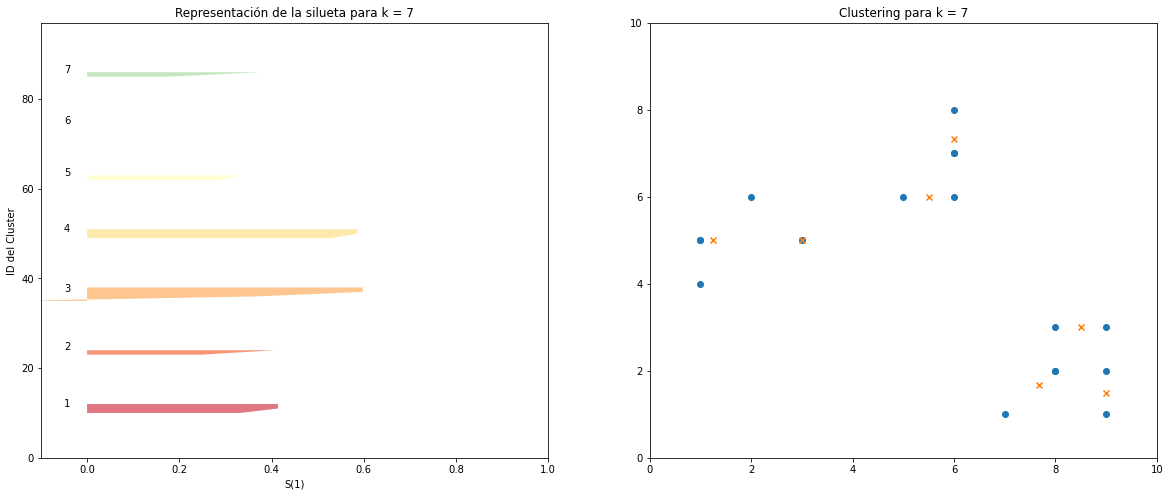

* Para k =  8 , el promedio de la silueta es:  0.35284612510104646
   - Para i =  1 , la silueta del cluster vale:  0.32882042637679976
   - Para i =  2 , la silueta del cluster vale:  0.263812295212263
   - Para i =  3 , la silueta del cluster vale:  0.6152265411044983
   - Para i =  4 , la silueta del cluster vale:  0.31700053499298475
   - Para i =  5 , la silueta del cluster vale:  0.5664789734180768
   - Para i =  6 , la silueta del cluster vale:  0.0
   - Para i =  7 , la silueta del cluster vale:  0.0
   - Para i =  8 , la silueta del cluster vale:  0.0


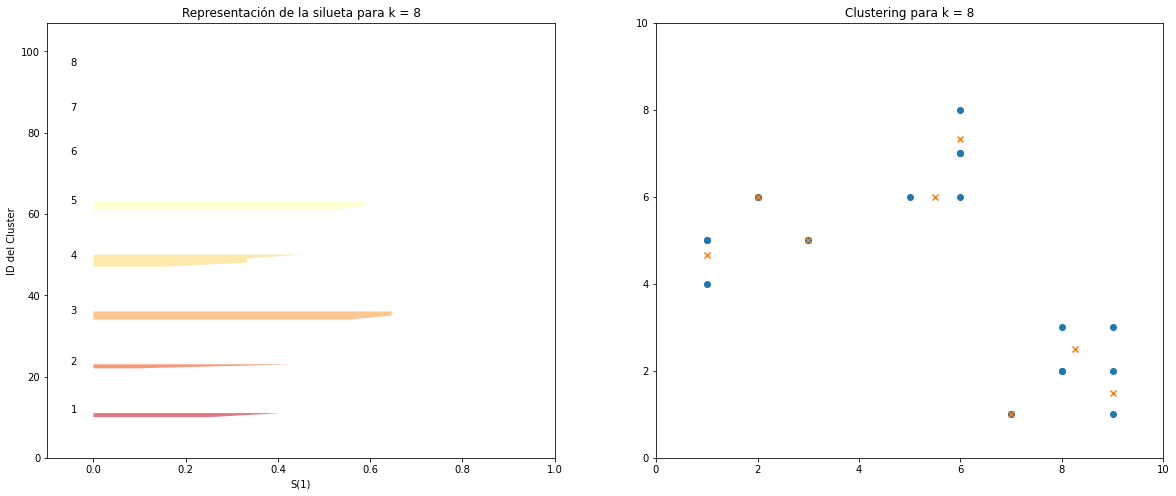

* Para k =  9 , el promedio de la silueta es:  0.39932610787930767
   - Para i =  1 , la silueta del cluster vale:  0.6152265411044983
   - Para i =  2 , la silueta del cluster vale:  0.0
   - Para i =  3 , la silueta del cluster vale:  0.32882042637679976
   - Para i =  4 , la silueta del cluster vale:  0.14644660940672627
   - Para i =  5 , la silueta del cluster vale:  0.0
   - Para i =  6 , la silueta del cluster vale:  0.5664789734180768
   - Para i =  7 , la silueta del cluster vale:  0.14644660940672627
   - Para i =  8 , la silueta del cluster vale:  1.0
   - Para i =  9 , la silueta del cluster vale:  0.0


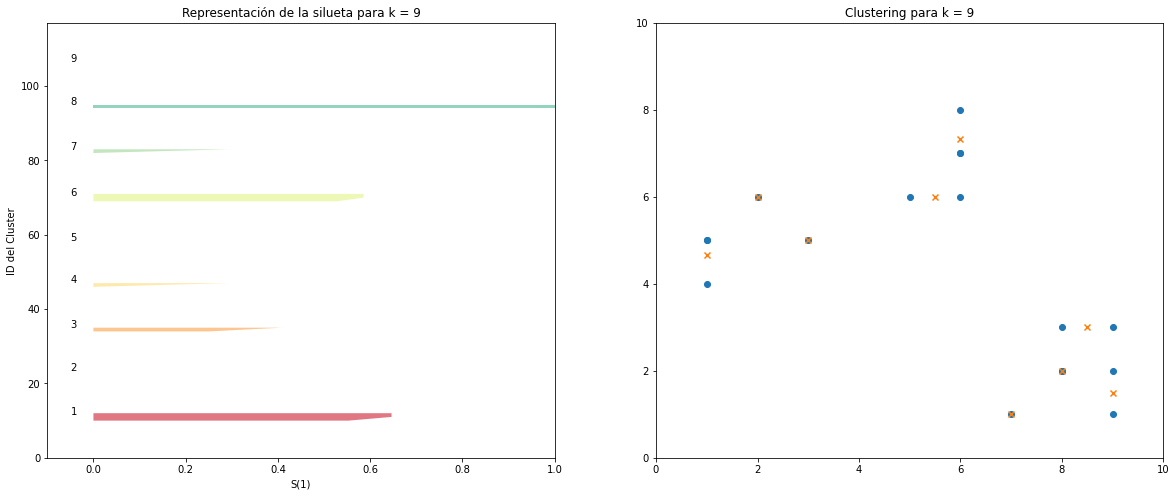

In [21]:
max_k = 10
K = range(1, max_k)
ssw = []
color_palette = [plt.get_cmap('Spectral')(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))

for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(X)
    
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels  = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = (color_palette[i] for i in labels)
    
    # Fabricando silueta para cada cluster
    
    if 1 < k < len(X):
        # Crear subplot de una fila y dos columnas
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        # 1er: siluetas. Se han controlado valores entre -0.1 y 1 
        axis1.set_xlim([-0.1,1])
        # Número de clusters a insertar determinará tamaño de cada barra
        axis1.set_ylim(0, len(X) + (k+1) * 10)
        
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ",k,", el promedio de la silueta es: ", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        for i in range(k):
            # Agregando silueta del cluster k
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("   - Para i = ", i+1,", la silueta del cluster vale: ",np.mean(ith_cluster_sv))
            # Ordenamos descendientemente las siluetas del cluster i-ésimo
            ith_cluster_sv.sort()
            
            # Calculamos dónde colocar la primera silueta en el eje vertical
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            # Elegimos el color del cluster
            color = color_palette[i]
            
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            
            # Etiquetamos dicho cluster con número en el centro
            axis1.text(-0.05, y_lower + 0.5*ith_cluster_size, str(i+1))
            
            # Calculamos nuevo y_lower para siguiente cluster del gráfico
            y_lower = y_upper + 10
            
        axis1.set_title("Representación de la silueta para k = %s"%str(k))
        axis1.set_xlabel("S(1)")
        axis1.set_ylabel("ID del Cluster")
        
        # Fin silueta
    # Plot de kmeans
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para k = %s"%str(k))
    plt.scatter(x1, x2, cmap = label_color)
    plt.scatter(centers[0], centers[1], cmap=color_palette, marker ="x")
    plt.show()

## Representación del codo

[]

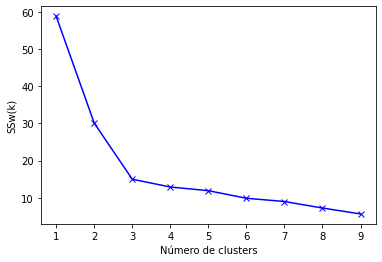

In [25]:
plt.plot(K, ssw, "bx-")
plt.xlabel("Número de clusters")
plt.ylabel("SSw(k)")
plt.plot()

### Representación del codo normalizado

[]

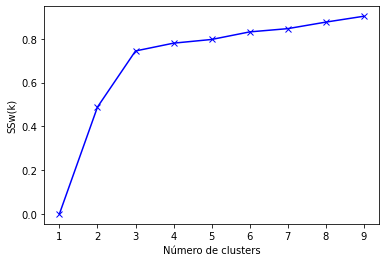

In [27]:
plt.plot(K, 1 - ssw/sst, "bx-")
plt.xlabel("Número de clusters")
plt.ylabel("SSw(k)")
plt.plot()